In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns

In [20]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

### Задание 1

В качестве анализируемых данных были взяты данные по трендам в русскоязычном сегменте youtube   
https://www.kaggle.com/datasnaek/youtube-new?select=RU_category_id.json  
https://www.kaggle.com/datasnaek/youtube-new/data?select=RUvideos.csv

In [15]:
with open('RU_category_id.json') as js_f:
    meta_data = json.load(js_f)
id_dict = {}
for i in range(1,45):
    id_dict[str(i)] = 'Not classified'
for dicts in meta_data['items']:
    id_dict[dicts['id']] = dicts['snippet']['title']
id_dict

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '3': 'Not classified',
 '4': 'Not classified',
 '5': 'Not classified',
 '6': 'Not classified',
 '7': 'Not classified',
 '8': 'Not classified',
 '9': 'Not classified',
 '10': 'Music',
 '11': 'Not classified',
 '12': 'Not classified',
 '13': 'Not classified',
 '14': 'Not classified',
 '15': 'Pets & Animals',
 '16': 'Not classified',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Not classified',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [16]:
tube_data = pd.read_csv('RUvideos.csv');
tube_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40739 entries, 0 to 40738
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40739 non-null  object
 1   trending_date           40739 non-null  object
 2   title                   40739 non-null  object
 3   channel_title           40739 non-null  object
 4   category_id             40739 non-null  int64 
 5   publish_time            40739 non-null  object
 6   tags                    40739 non-null  object
 7   views                   40739 non-null  int64 
 8   likes                   40739 non-null  int64 
 9   dislikes                40739 non-null  int64 
 10  comment_count           40739 non-null  int64 
 11  thumbnail_link          40739 non-null  object
 12  comments_disabled       40739 non-null  bool  
 13  ratings_disabled        40739 non-null  bool  
 14  video_error_or_removed  40739 non-null  bool  
 15  de

In [17]:
# в столбце 'category_id' заменим id на полное название категории
tube_data['category_id'] = tube_data['category_id'].apply(lambda x: id_dict[str(x)])
tube_data.rename(columns={'category_id':'category'}, inplace=True)

<AxesSubplot:title={'center':'Просмотры для каждой категории видео'}, xlabel='Категория', ylabel='Кол-во просмотров'>

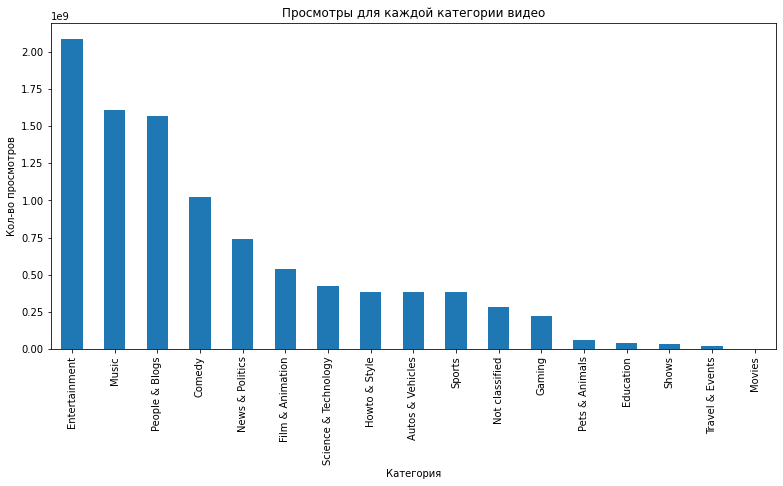

In [21]:
# Столбцовая диаграмма просмотров различных категорий видео за все время
tube_data.groupby('category').sum().sort_values(by='views', ascending=False)['views'].plot(kind='bar',
                                                                                           xlabel='Категория',
                                                                                           ylabel='Кол-во просмотров',
                                                                                           title = 'Просмотры для каждой категории видео')
# Из графика видно, что наибольшей популярностью в России пользуются развлекательные, музыкальные видео, а также видеоблоги

Text(0.5, 1.0, 'Распределение развлекательных роликов по числу просмотров')

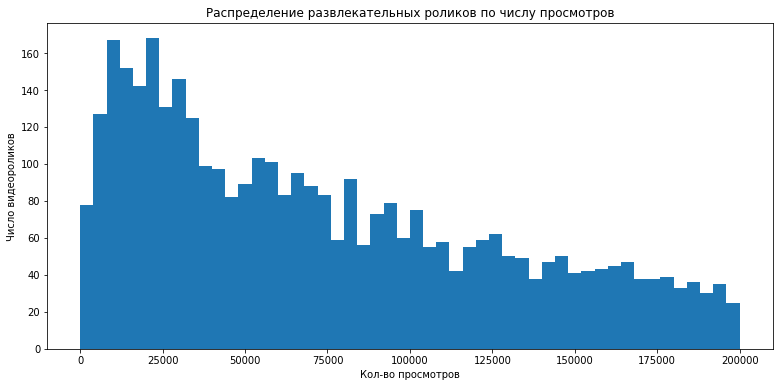

In [23]:
# Гистограмма распределения числа просмотров для определенного вида видеоконтента
tube_data[tube_data['category'] == 'Entertainment']['views'].plot(kind='hist', bins=50, range=(0,200000))
plt.xlabel('Кол-во просмотров')
plt.ylabel('Число видеороликов')
plt.title('Распределение развлекательных роликов по числу просмотров')
# График показывает, что четкого распеределения числа просмотров нет

Text(0.5, 1.0, 'Соотношение лайков и дизлайков в категории "Comedy"')

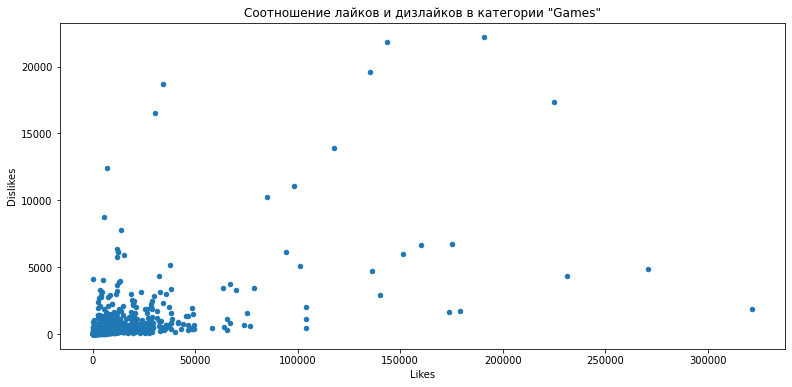

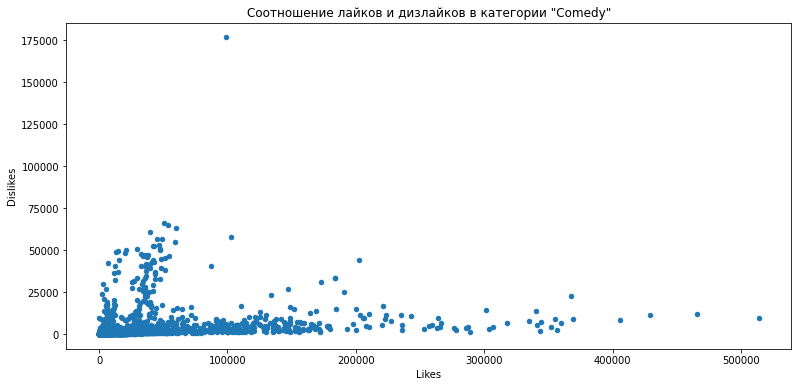

In [25]:
# Найдем соотношение числа лайков и дизлайков для категорий видео 'Gaming' и 'Comedy'
tube_data[tube_data['category'] == 'Gaming'].plot(kind='scatter', x='likes',y='dislikes')
plt.xlabel('Likes')
plt.ylabel('Dislikes')
plt.title('Соотношение лайков и дизлайков в категории "Games"')
tube_data[tube_data['category'] == 'Comedy'].plot(kind='scatter', x='likes',y='dislikes')
plt.xlabel('Likes')
plt.ylabel('Dislikes')
plt.title('Соотношение лайков и дизлайков в категории "Comedy"')
# Из графиков видно, что при просмотре виде данных категорий люди склонны просматривать видео, которые им априори нравятся

In [27]:
# Сформируем таблицу по суммарному числу просмотров видео каждой категории за каждый день наблюдений
tube_time_data = tube_data.pivot_table(index='trending_date',columns='category',values='views',aggfunc=sum).fillna(0)
tube_time_data

category,Autos & Vehicles,Comedy,Education,Entertainment,Film & Animation,Gaming,Howto & Style,Movies,Music,News & Politics,Not classified,People & Blogs,Pets & Animals,Science & Technology,Shows,Sports,Travel & Events
trending_date,,,,,,,,,,,,,,,,,
17.01.12,1345284.0,3076325.0,89189.0,21123424.0,1995731.0,1725279.0,477964.0,0.0,3686044.0,1070976.0,1587024.0,4023844.0,524357.0,999615.0,83773.0,617534.0,76332.0
17.02.12,938312.0,3978753.0,12054.0,14568794.0,2847528.0,63624.0,1304224.0,0.0,11797681.0,1247304.0,2178890.0,2732278.0,54313.0,400994.0,186610.0,858662.0,110834.0
17.03.12,1936071.0,4963521.0,211450.0,12200396.0,2454717.0,504887.0,1112926.0,0.0,3928014.0,838024.0,162782.0,5390411.0,30559.0,1220179.0,0.0,1393491.0,249151.0
17.04.12,1924134.0,6815191.0,233997.0,6986024.0,1499835.0,882568.0,2116451.0,0.0,3636616.0,1093153.0,429381.0,5261018.0,89910.0,1122369.0,480878.0,3371720.0,743136.0
17.05.12,3099800.0,6337332.0,62547.0,3853632.0,1200049.0,426705.0,529402.0,0.0,2689624.0,1372402.0,401965.0,5249554.0,406880.0,945925.0,673304.0,1485245.0,796464.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18.30.04,748426.0,1853756.0,2312.0,4312917.0,1128511.0,681473.0,1480069.0,0.0,10716061.0,1073937.0,9368.0,1688614.0,75519.0,1711393.0,179789.0,2258515.0,22714.0
18.30.05,1913564.0,4735415.0,162288.0,6842952.0,3559510.0,197127.0,2347895.0,0.0,8538543.0,2046026.0,1269040.0,6426041.0,337746.0,2311149.0,0.0,1509515.0,37455.0
18.31.01,2357995.0,2812160.0,445049.0,7025593.0,3637117.0,831852.0,1798782.0,0.0,1254396.0,3508878.0,1919715.0,13952454.0,5666.0,3088823.0,19756.0,2100278.0,255593.0


<AxesSubplot:title={'center':'Число просмотров видео о политике и спорте с весь период времени'}, xlabel='Дата', ylabel='Число просмотров'>

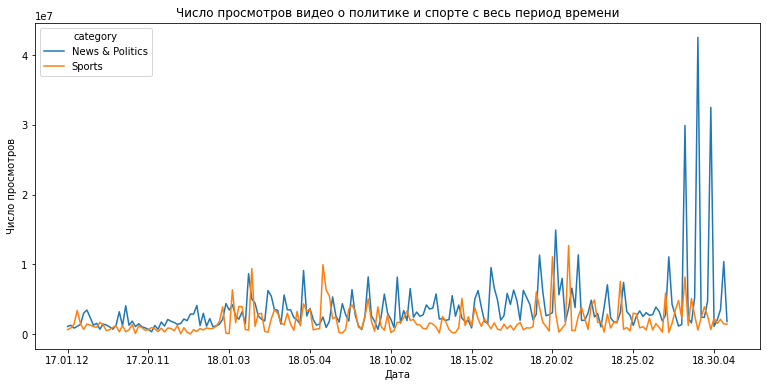

In [28]:
# Рассмотрим эволюцию количества просмотров видеороликов 'News & Politics' и 'Sports' за все время ведения наблюдений
tube_time_data[['News & Politics', 'Sports']].plot(xlabel = 'Дата', ylabel='Число просмотров', title='Число просмотров видео о политике и спорте с весь период времени')
# Таким образом, активнось просмотров в категории 'News & Politics' повысилась в апреле 18-го
# В категории 'Sports' наблюдается всплеск активности в феврале 18-го года, что, по всей видимости, связано с 
# проведением зимней Олимпиады